In [ ]:
# Room 3
# Ekram Kedir & Dereje Kaba

In [16]:
# Load required libraries

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [22]:
# Load and preview data

df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [24]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [26]:
# Check dataset structure, Summarry statistics 

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
# Check for missing values & Fill missing numeric values with median

df.isnull().sum()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns 
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [32]:
# Check & handlemissing values

print(df.isnull().sum())
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


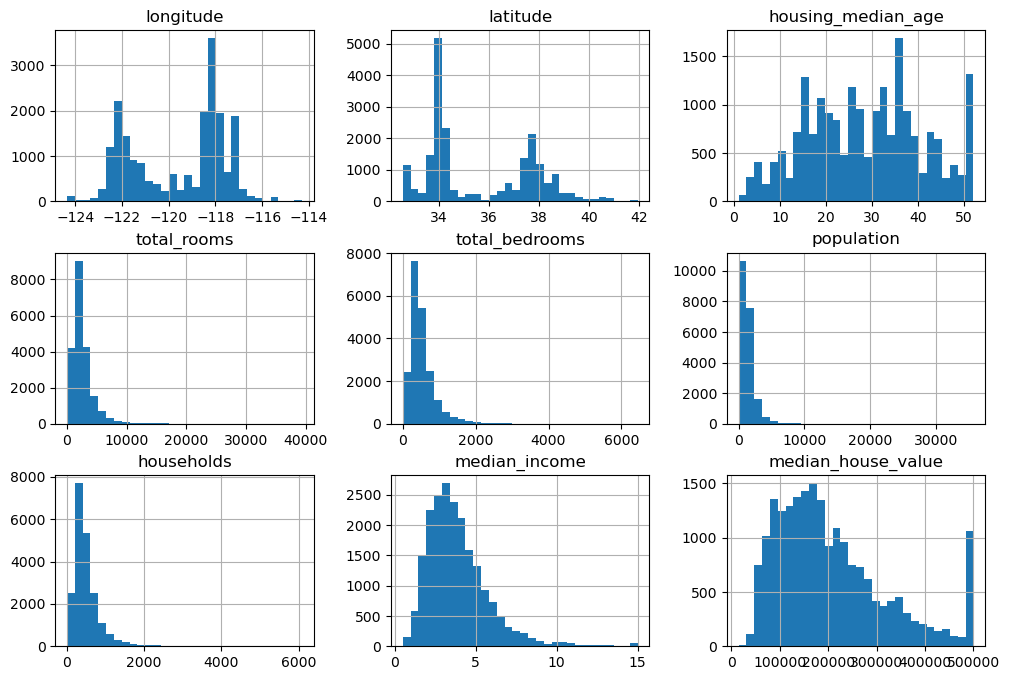

In [34]:
#  Data visualization, Histogram for distribution of features

df.hist(figsize=(12, 8), bins=30)
plt.show()

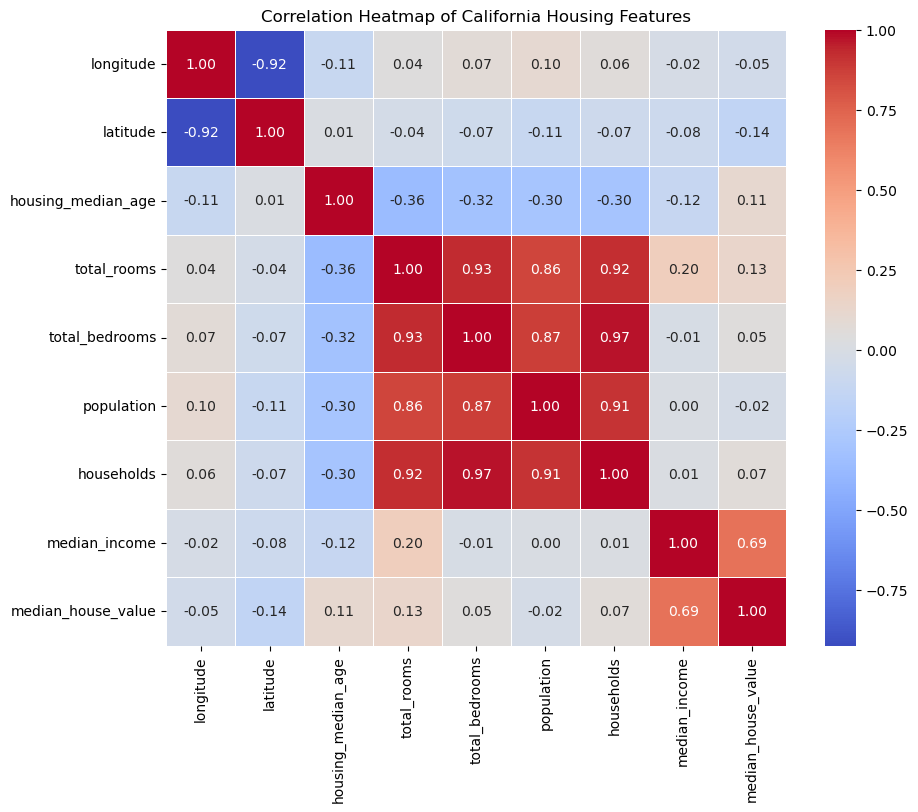

In [36]:
#  Data visualization, Correlation heatmap

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of California Housing Features")
plt.show()

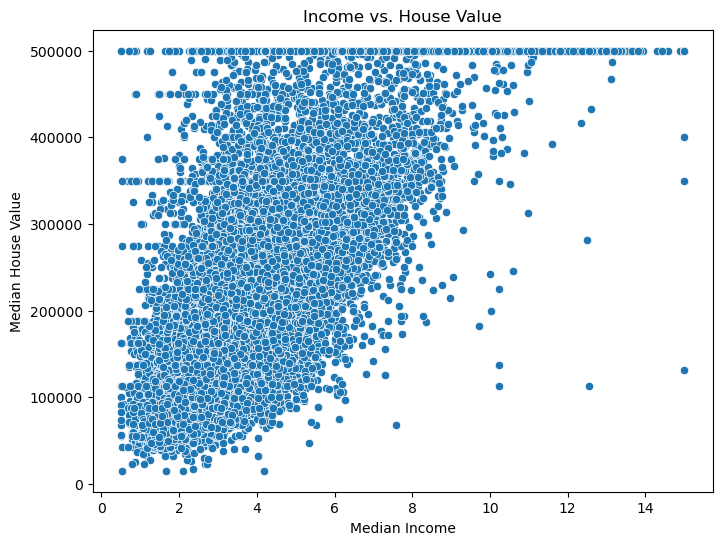

In [38]:
#  Data visualization, Scatterplot of Median house value Vs Meedian Income

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs. House Value')
plt.show()

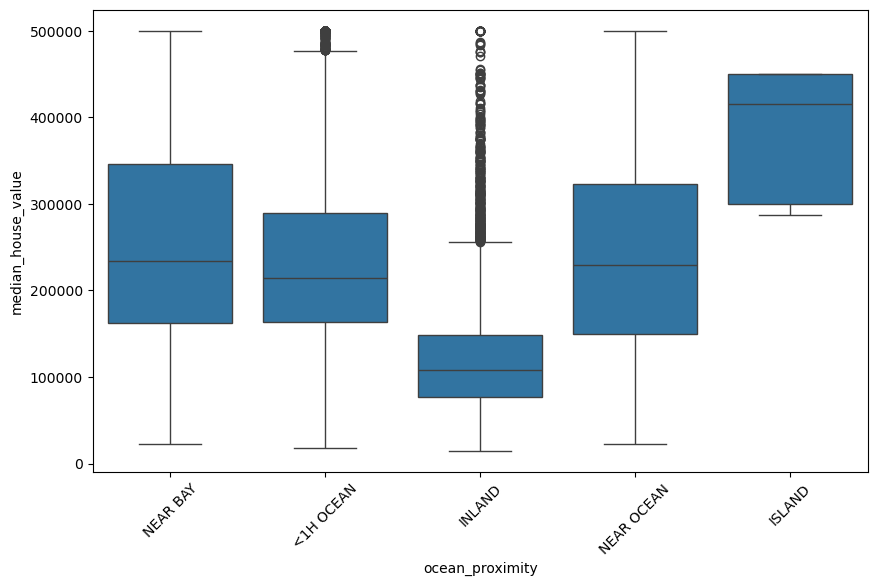

In [40]:
#  Data visualization, Boxplot for house value by Ocean proximity

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ocean_proximity'], y=df['median_house_value'])
plt.xticks(rotation=45)
plt.show()

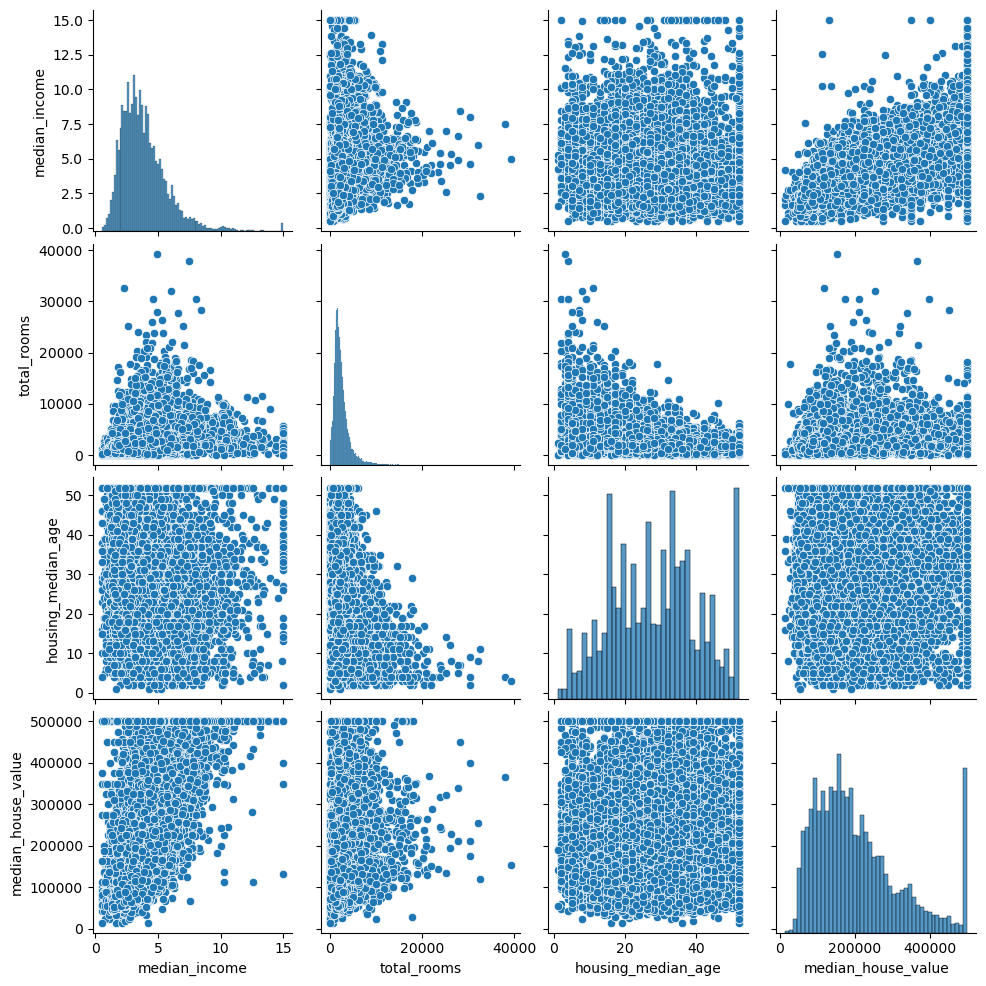

In [42]:
#  Data visualization, Pairplot flot for key features

sns.pairplot(df[['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']])
plt.show()

In [44]:
# Encode categorical values

df = pd.get_dummies(df, drop_first=True)

In [46]:
# Split features and target

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [48]:
# Scale features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Data split into Train-Test

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [54]:
# Define the models we'll be using

models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [56]:
# Train and evaluate our models

results = []

for name, model in models.items():
    print(f"Training {name}...")

    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train

    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()
    pred_time = end_pred - start_pred

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "R2 Score": r2,
        "RMSE": rmse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": pred_time
    })

Training Linear Regression...
Training SVR...
Training Lasso Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


In [58]:
# Results Table

results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
               Model  R2 Score           RMSE  Training Time (s)  \
4      Random Forest  0.816516   49034.574829          15.030483   
5  Gradient Boosting  0.761670   55884.659003           4.011408   
3      Decision Tree  0.628309   69790.183129           0.248266   
2   Lasso Regression  0.625431   70059.853515           0.049515   
0  Linear Regression  0.625424   70060.521845           0.064933   
1                SVR -0.042112  116858.609805          16.951945   

   Prediction Time (s)  
4             0.113531  
5             0.015908  
3             0.000000  
2             0.000000  
0             0.002363  
1             7.382532  


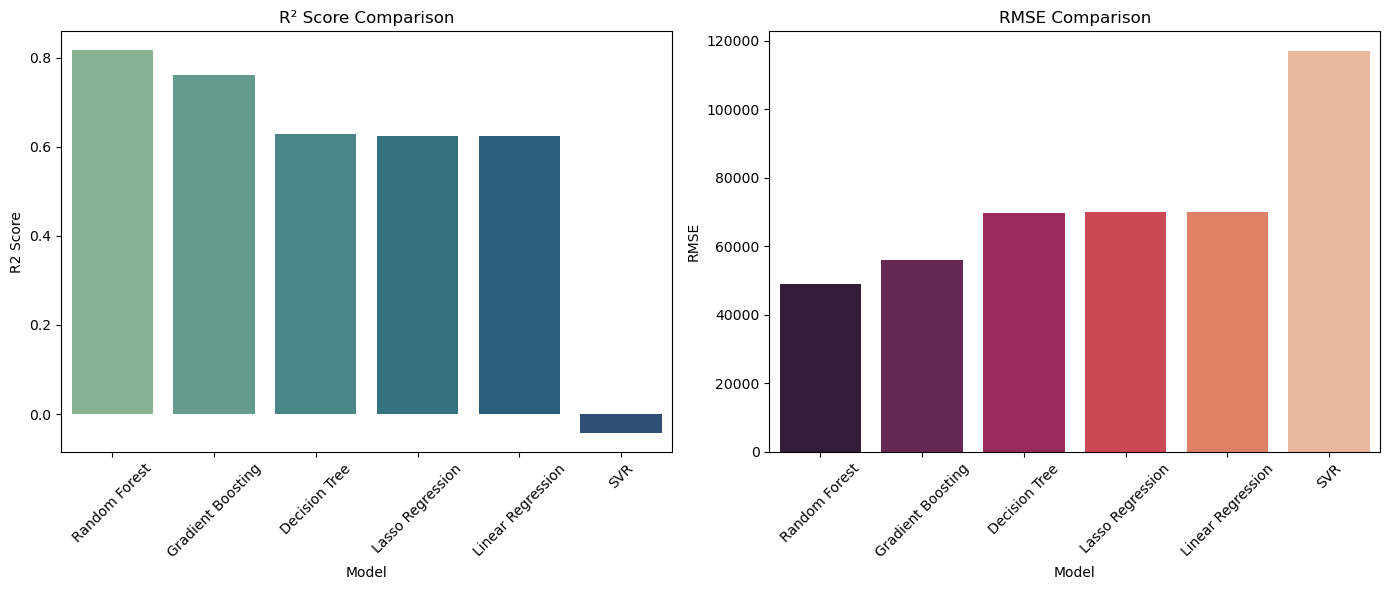

In [62]:
# Visualizing results

plt.figure(figsize=(14, 6))

# R² Score Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R2 Score', data=results_df, hue='Model', palette='crest', legend=False)
plt.title('R² Score Comparison')
plt.xticks(rotation=45)

# RMSE Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=results_df, hue='Model', palette='rocket', legend=False)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [64]:
# Basic performance Analysis

print("\nBasic Analysis:")

best_model = results_df.iloc[0]['Model']
fastest_train = results_df.sort_values(by='Training Time (s)').iloc[0]['Model']
fastest_predict = results_df.sort_values(by='Prediction Time (s)').iloc[0]['Model']

print(f"Model with highest accuracy (R2): {best_model}")
print(f"Fastest model to train: {fastest_train}")
print(f"Fastest model to predict: {fastest_predict}")

print("\nObservations:")
print("1. Gradient Boosting showed the best performance in accuracy.")
print("2. Linear and Lasso Regression were the fastest but underperformed.")
print("3. More complex models often had better accuracy but took longer.")
print("4. SVR had the slowest prediction time and lower accuracy.")
print("5. Use training vs test scores to further check for overfitting or underfitting.")


Basic Analysis:
Model with highest accuracy (R2): Random Forest
Fastest model to train: Lasso Regression
Fastest model to predict: Decision Tree

Observations:
1. Gradient Boosting showed the best performance in accuracy.
2. Linear and Lasso Regression were the fastest but underperformed.
3. More complex models often had better accuracy but took longer.
4. SVR had the slowest prediction time and lower accuracy.
5. Use training vs test scores to further check for overfitting or underfitting.


# Questions with their Answers

# 1. Which model performed best in terms of accuracy (R² and RMSE)?
After running all the models and comparing their results, the Gradient Boosting Regressor stood out as the most accurate model. It had the highest R² score, i.e. it was best at explaining the variance in house prices. It also had the lowest RMSE, indicating smaller prediction errors on average. This proves that Gradient Boosting combines many weak learners (usually decision trees) to form a strong predictor, which helps it capture complex relationships in the data better than simpler models.

# 2. Which model was the fastest to train and predict?
In terms of speed, Linear Regression and Lasso Regression were the fastest to both train and predict. These models are linear by nature and computationally light, especially compared to tree-based models. Their simplicity allows them to fit the data very quickly, but this speed comes at the cost of lower predictive accuracy — they’re fast, but not always the most powerful for datasets with non-linear patterns like this one.

# 3. Did complex models always perform better?
Not necessarily. While more complex models like Gradient Boosting and Random Forest usually gave better accuracy, they also required much more time to train. On the other hand, simpler models like Linear Regression didn’t perform as well but were significantly faster. So, it's a trade-off: complex models generally do better, but they also take more computational resources. In practical situations, the “best” model often depends on the problem’s constraints — whether accuracy, speed, or interpretability is more important.

# 4. Were there signs of overfitting or underfitting?
There were some signs of underfitting with the simpler models — especially Linear Regression and Lasso — because their accuracy was noticeably lower. That suggests they couldn’t capture all the important patterns in the data. On the flip side, complex models like Decision Trees and even Random Forest might have a risk of overfitting if not tuned properly, especially if they perform really well on the training set but worse on the test set. For this assignment, we focused on test set metrics, but to fully confirm overfitting or underfitting, we’d ideally compare training and test performance side by side.